In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

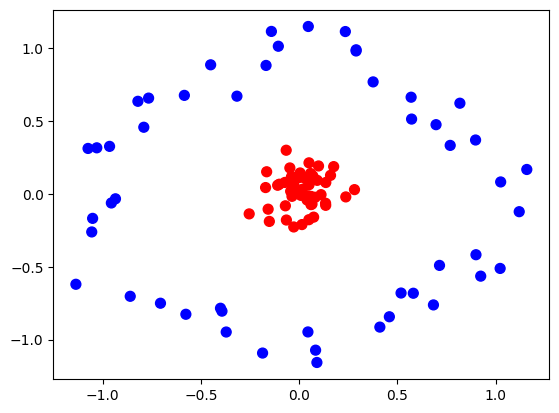

In [ ]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)


# Initial visulization

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
# linear svm(why it fails)
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6

In [8]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

C:\Users\rosha\AppData\Local\Temp\ipykernel_25856\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


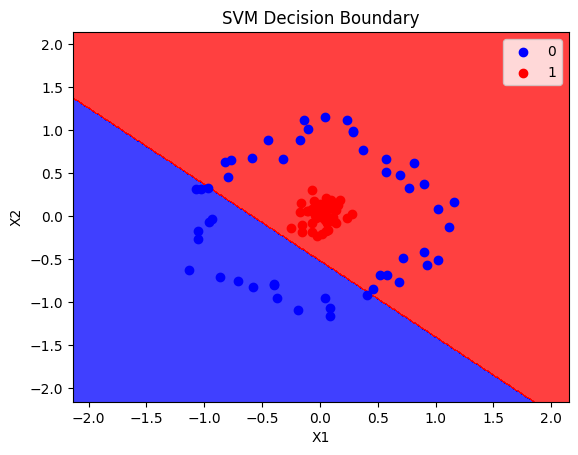

In [9]:
plot_decision_boundary(X, y, classifier)

In [10]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

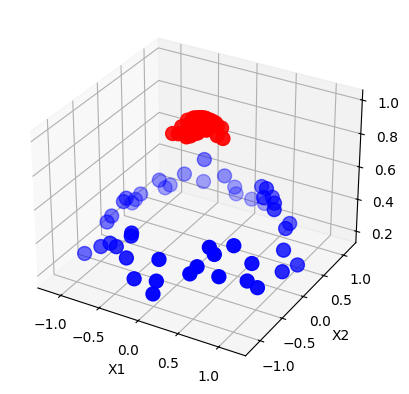

In [11]:
plot_3d_plot(X,y)

In [ ]:
# rbf :--> tumahare jaise exp transforamtion (infinite space me mapping karta hai)
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [13]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\rosha\AppData\Local\Temp\ipykernel_25856\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


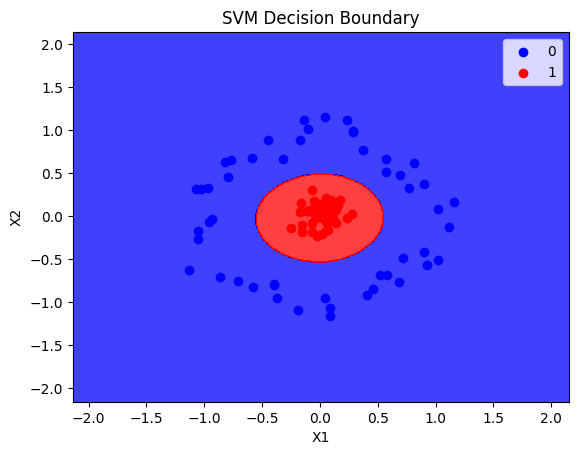

In [14]:
plot_decision_boundary(X, y, rbf_classifier)

In [ ]:
# polynoniamls ->> curve banta hai 
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

: 

In [23]:
accuracy_score(y_test, y_pred)

0.6

C:\Users\rosha\AppData\Local\Temp\ipykernel_25856\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


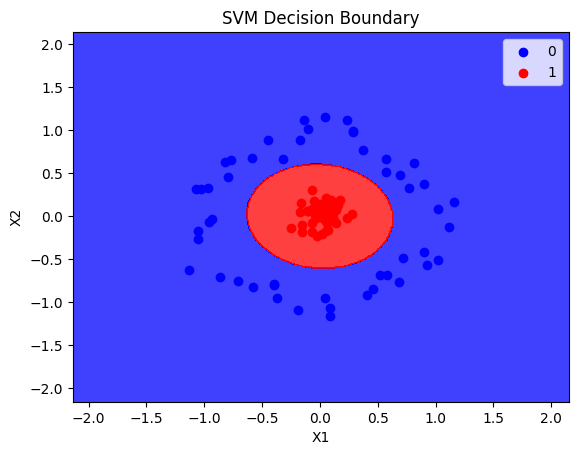

In [17]:
plot_decision_boundary(X, y, poly_classifier)

In [18]:
X

array([[-4.28929748e-02,  1.02542447e-01],
       [ 1.02556334e+00,  8.32689956e-02],
       [ 4.45217020e-02, -9.47049289e-01],
       [ 2.89608576e-01,  9.82941390e-01],
       [-3.88278808e-02,  1.20022368e-01],
       [-1.06129318e-01,  1.01545922e+00],
       [ 6.92789765e-02,  1.24699965e-01],
       [-1.13650981e+00, -6.19662386e-01],
       [ 1.75616588e-01,  1.88584629e-01],
       [-9.65108051e-01,  3.27644461e-01],
       [-7.89859778e-04,  1.13320344e-01],
       [-3.93050415e-01, -8.04284504e-01],
       [-1.09616724e-01,  6.05220041e-02],
       [ 4.10622268e-01, -9.13846284e-01],
       [ 9.01956194e-02, -1.15684244e+00],
       [-1.65526362e-01,  1.53223321e-01],
       [ 6.00480860e-02, -7.23079900e-02],
       [ 2.81512092e-01,  3.05026561e-02],
       [ 1.02283845e+00, -5.10821824e-01],
       [ 8.17968223e-01,  6.24105098e-01],
       [-1.05582670e+00, -2.60190044e-01],
       [ 7.14267441e-01, -4.90018503e-01],
       [ 3.76337785e-01,  7.70578336e-01],
       [-1.

In [ ]:
np.exp(-(X**2)).sum(1) # add x and y cooridnates

array([1.98770202, 1.34240561, 1.4058508 , 1.30008419, 1.98419142,
       1.34539375, 1.97978212, 0.95595976, 1.93469036, 1.29219894,
       1.98723998, 1.38053371, 1.98439986, 1.27866236, 1.25419302,
       1.94976903, 1.99118592, 1.92287983, 1.12159853, 1.18957429,
       1.26253256, 1.38692365, 1.42017205, 1.22152746, 1.30977809,
       1.99773258, 1.90894686, 1.3923323 , 1.96462088, 1.08804412,
       1.99854898, 1.26718954, 1.95376569, 1.18687845, 1.95250468,
       1.34210792, 1.27074945, 1.99101852, 1.97815867, 1.30148939,
       1.98523402, 1.96917821, 1.99872021, 1.26357   , 1.39719781,
       1.98837377, 1.27082344, 1.97687905, 1.99601374, 1.99774218,
       1.982736  , 1.97551052, 1.99338908, 1.25004023, 1.28564884,
       1.48772292, 1.96702287, 1.94488317, 1.94251864, 1.54072825,
       1.99984865, 1.17738159, 1.42999549, 1.96979331, 1.27854745,
       1.3177644 , 1.26927855, 1.99675708, 1.44808804, 1.99841776,
       1.39416813, 1.96446354, 1.30360844, 1.98858986, 1.98554

In [ ]:
X_new=np.exp(-(X**2))# store new X

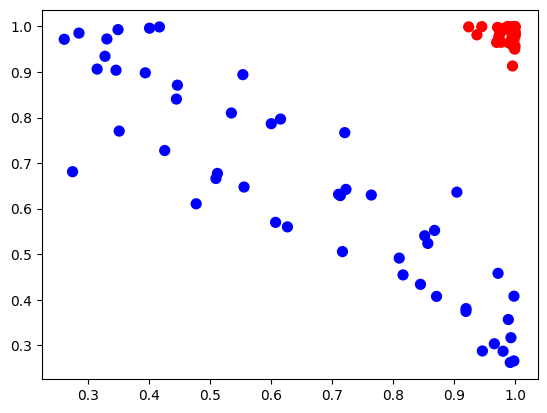

In [21]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')